In [1]:
from correlate_tweets import correlate_data

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
ts_all = correlate_data()

print(ts_all.head())
print('total clinton tweets: {}'.format(ts_all.clinton.sum()))

            clinton  metvi_all  metvi_clinton_obj  metvi_clinton_subj  \
2016-09-01       20   1.166667           0.166667            0.166667   
2016-09-02        9   2.000000           1.000000            0.000000   
2016-09-03        7        NaN                NaN                 NaN   
2016-09-04        6        NaN                NaN                 NaN   
2016-09-05       12   1.000000           0.000000            0.000000   

           metvi_cnn metvi_foxnews metvi_msnbc  metvi_trump_obj  \
2016-09-01         0             2         1.5              0.5   
2016-09-02         2             0           6              0.0   
2016-09-03       NaN           NaN         NaN              NaN   
2016-09-04       NaN           NaN         NaN              NaN   
2016-09-05         2             0         NaN              0.0   

            metvi_trump_subj  trump  
2016-09-01          0.166667     12  
2016-09-02          0.400000      5  
2016-09-03               NaN      5  
2016-0

In [3]:
print('total trump tweets: {}'.format(ts_all.trump.sum()))

total trump tweets: 1017


In [4]:
# ts_all.dropna(inplace=True)
# ts_all.head()

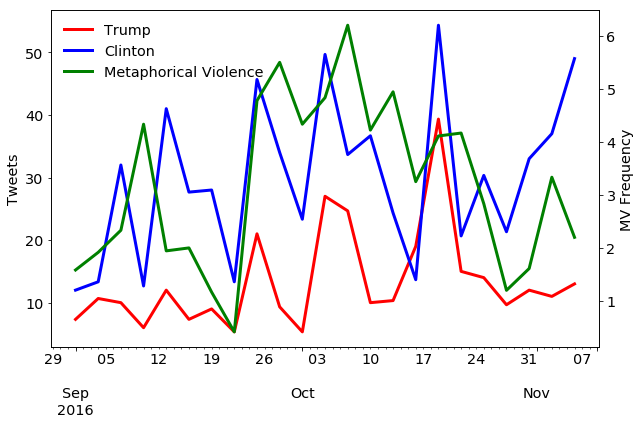

In [5]:
from matplotlib.lines import Line2D
from datetime import datetime

ts_all = ts_all[ts_all.index < datetime(2016,11,9)]

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()
ts_all[['trump', 'clinton']].resample('3d').mean().plot(ax=ax1, color=['r', 'b'], lw=3)
ts_all['metvi_all'].resample('3d').mean().plot(ax=ax2, color='green', label='MetVi', lw=3)

lines = [
    Line2D([0], [0], color='r', lw=3), 
    Line2D([0], [0], color='b', lw=3),
    Line2D([0], [0], color='g', lw=3)
]
labels = ['Trump', 'Clinton', 'Metaphorical Violence']

ax1.legend(lines, labels, frameon=False)

ax1.set_ylabel('Tweets')
ax2.set_ylabel('MV Frequency');

Text(0,0.5,'MV Frequency (All)')

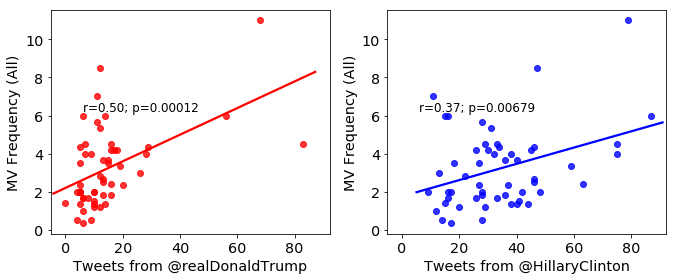

In [6]:
import seaborn as sns

from scipy.stats import pearsonr


fig, axes = plt.subplots(1, 2, figsize=(9.5, 4))

xl = 'trump'; yl = 'metvi_all'
dfcols = ts_all[[xl, yl]].dropna()
x = dfcols[xl]
y = dfcols[yl]
# g = sns.regplot(x=xl, y=yl, data=ts_all, ax=axes[0])
g1 = sns.regplot(x=x, y=y, ax=axes[0], color='red', ci=None)

axes[0].text(6.0, 6.25, 'r={:.2f}; p={:.5f}'.format(*pearsonr(x, y)), fontsize=12)

xl = 'clinton'; yl = 'metvi_all'
dfcols = ts_all[[xl, yl]].dropna()
x = dfcols[xl]
y = dfcols[yl]

# g = sns.regplot(x=xl, y=yl, data=ts_all, ax=axes[0])
g2 = sns.regplot(x=x, y=y, ax=axes[1], color='blue', ci=None)
axes[1].set_ylim(axes[0].get_ylim())
axes[1].set_xlim(axes[0].get_xlim() + np.array([-1.0, 5.0]))
axes[1].text(6.0, 6.25, 'r={:.2f}; p={:.5f}'.format(*pearsonr(x, y)), fontsize=12)
axes[0].set_xlim(axes[1].get_xlim())
plt.subplots_adjust(wspace=2.0)

axes[0].set_xlabel('Tweets from @realDonaldTrump')
axes[1].set_xlabel('Tweets from @HillaryClinton')
axes[0].set_ylabel('MV Frequency (All)')
axes[1].set_ylabel('MV Frequency (All)')
# plt.tight_layout()

## Impact of tweets on different facets of MV use

Above we have regressions of counts of frequency of all metaphorical violence usage against the number of tweets by each 2016 candidate. Now we do the same thing, but for MV frequency on each network and casting each candidate as the subject or object of metaphorical violence.

In [7]:
from correlate_tweets import plot_regressions
ts_all = correlate_data()

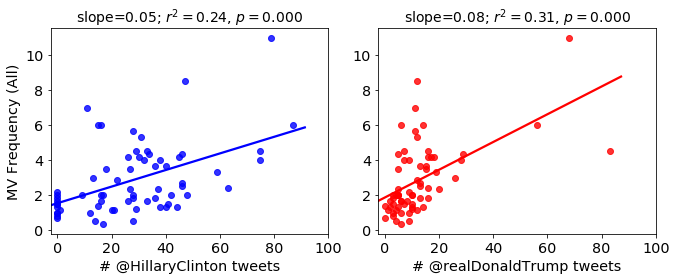

In [8]:
plot_regressions(ts_all, save_path='/Users/mt/Desktop/test-all.pdf')

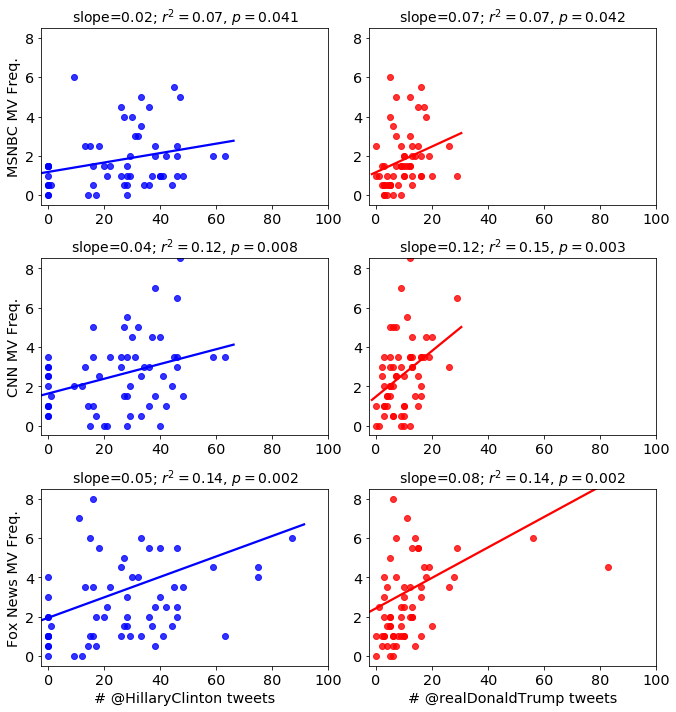

In [9]:
plot_regressions(ts_all, by='network', save_path='/Users/mt/Desktop/test-by-network.pdf')

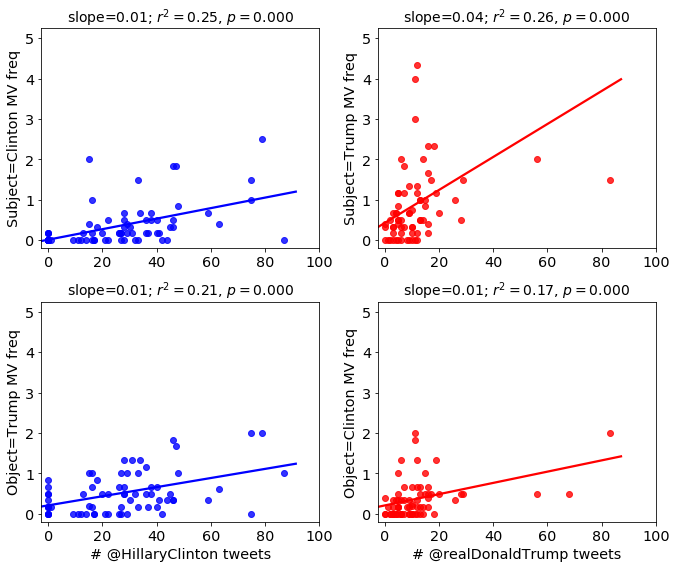

In [10]:
plot_regressions(ts_all, by='subjobj', save_path='/Users/mt/Desktop/test-subjobj.pdf')

## Metvi-Tweet regressions for 2012 

In [11]:
ts_all = correlate_data(year=2012)
ts_all.head()

,metvi_all,metvi_cnn,metvi_foxnews,metvi_msnbc,metvi_obama_obj,metvi_obama_subj,metvi_romney_obj,metvi_romney_subj,obama,romney
2012-08-31,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN
2012-09-01,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,24.0,1.0
2012-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.0
2012-09-03,4.666667,NaN,9,2.5,0.666667,0.333333,1.333333,0.333333,24.0,1.0
2012-09-04,1.500000,3,0,3,0.250000,0.000000,0.000000,0.000000,28.0,6.0


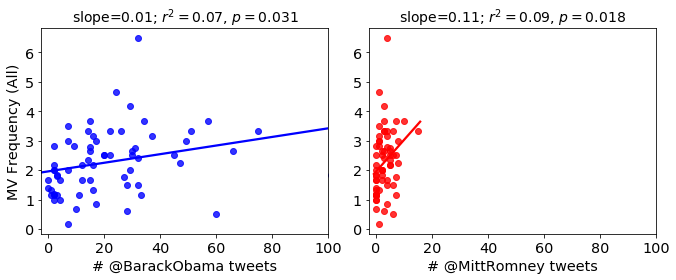

In [12]:
plot_regressions(ts_all, save_path='/Users/mt/Desktop/test-all-2012.pdf', year=2012)

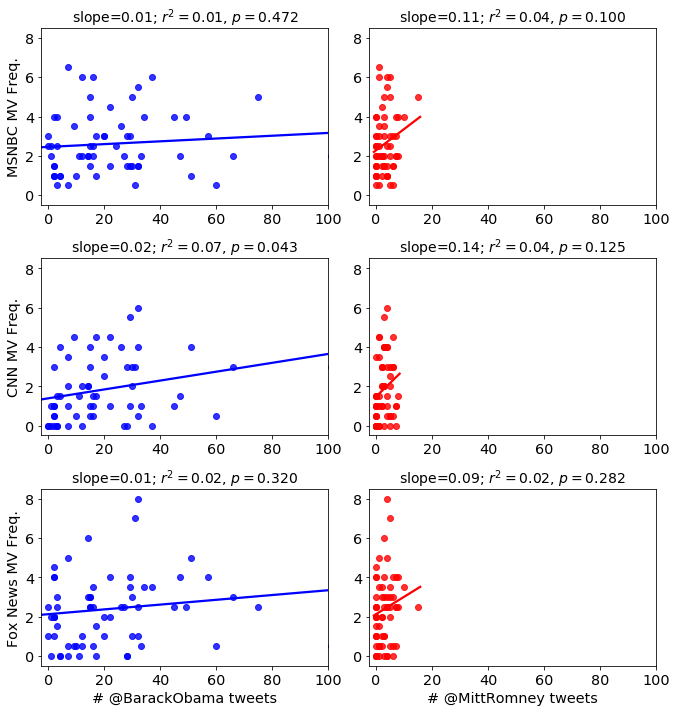

In [13]:
plot_regressions(ts_all, by='network', save_path='/Users/mt/Desktop/test-network-2012.pdf', year=2012)

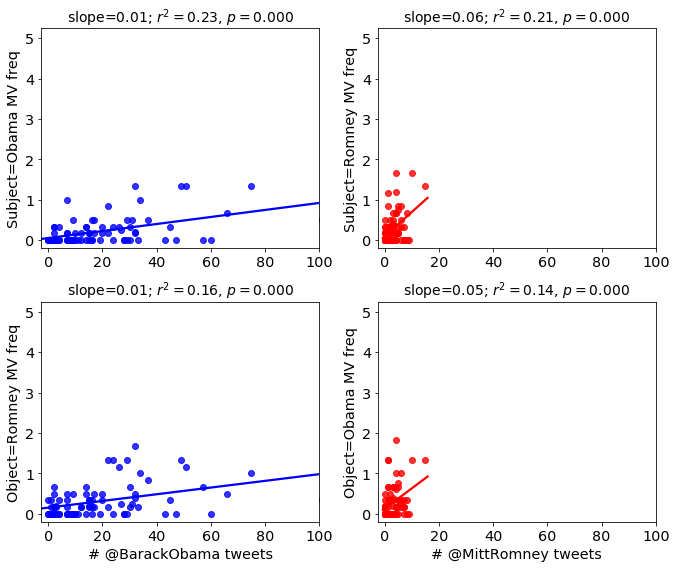

In [14]:
plot_regressions(ts_all, by='subjobj', save_path='/Users/mt/Desktop/test-subjobj-2012.pdf', year=2012)

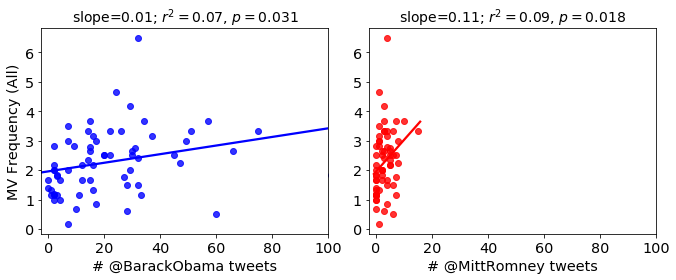

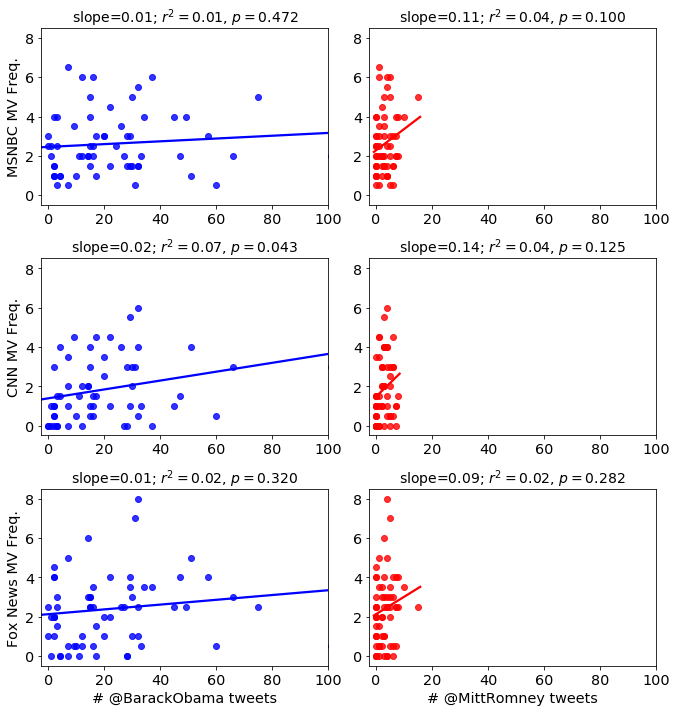

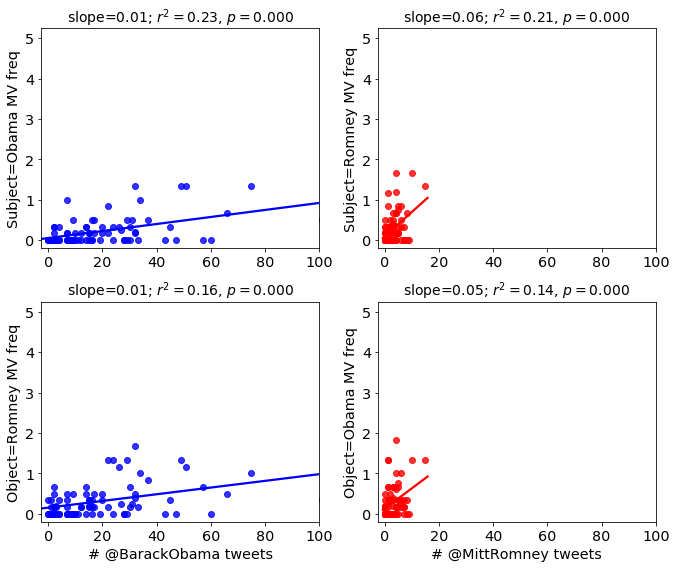

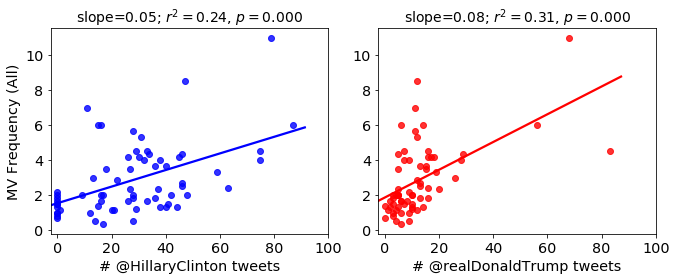

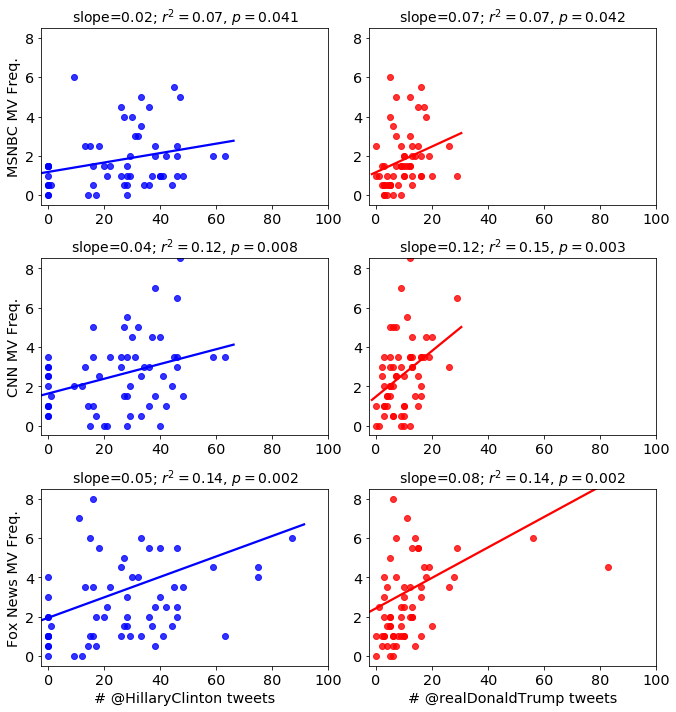

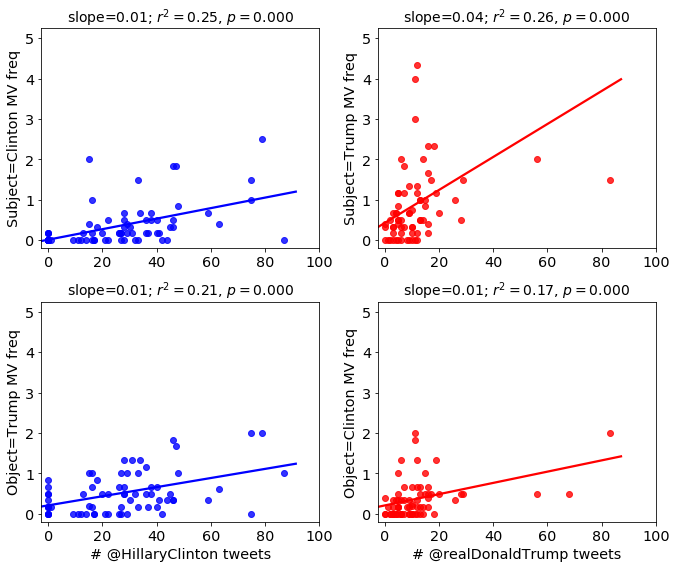

In [15]:
from correlate_tweets import (
    METAPHORS_URL_TEMPLATE, get_project_dataframe, correlate_data,
    plot_regressions
)

for year in [2012, 2016]:
    ts_all = correlate_data(year)
    for by in ['all', 'network', 'subjobj']:

        plot_regressions(
            ts_all, 
            by=by,
            save_path='/Users/mt/workspace/papers/viomet/natHumB/Figures/{}-{}.pdf'.format(
                year, by
            ), 
            year=year
        )